In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import altair as alt

In [2]:
all_data = pd.read_csv('F:\Lampros\data.csv')

f:\Lampros\Analysis of Delegates Voting Patterns in Arbitrum Proposals\Analysis\data_analysis\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Specify the proposal title to remove
proposal_id_to_remove = '0xe8bc33b7849bd1d7984a8d638444e2dd97b0dfa3f5f2c9dff28fcfe0247bdab3'

# Remove all rows with the specified proposal title
all_data = all_data[all_data['proposal_id'] != proposal_id_to_remove]

In [4]:
all_data.columns

Index(['id', 'voter', 'vp', 'vp_by_strategy', 'created', 'choice', 'reason',
       'proposal_id', 'proposal_title', 'proposal_body', 'proposal_choices',
       'proposal_type', 'year', 'month', 'day', 'time'],
      dtype='object')

In [5]:
proposal_data = pd.read_csv(r'proposals_data.csv', encoding='latin')

In [6]:
proposal_data.columns

Index(['Proposal_ID', 'Proposal_Title', 'Proposal_Type', 'Proposal_Created',
       'Proposal_Start_Date', 'Proposal_End_Date'],
      dtype='object')

In [7]:
proposal_data.shape

(145, 6)

### Remove the test proposal

In [8]:
# Specify the proposal title to remove
proposal_id_to_remove = '0xe8bc33b7849bd1d7984a8d638444e2dd97b0dfa3f5f2c9dff28fcfe0247bdab3'

# Remove all rows with the specified proposal title
proposal_data = proposal_data[proposal_data['Proposal_ID'] != proposal_id_to_remove]

In [9]:
proposal_data.shape

(144, 6)

In [10]:
# Convert the datatype of the date columns
proposal_data['Proposal_Created'] = proposal_data['Proposal_Created'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
proposal_data['Proposal_Created'] = pd.to_datetime(proposal_data['Proposal_Created'])

proposal_data['Proposal_Start_Date'] = proposal_data['Proposal_Start_Date'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
proposal_data['Proposal_Start_Date'] = pd.to_datetime(proposal_data['Proposal_Start_Date'])

proposal_data['Proposal_End_Date'] = proposal_data['Proposal_End_Date'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
proposal_data['Proposal_End_Date'] = pd.to_datetime(proposal_data['Proposal_End_Date'])

In [11]:
# generate new columns
proposal_data['proposal_year'] = proposal_data['Proposal_Created'].dt.year
proposal_data['proposal_month'] = proposal_data['Proposal_Created'].dt.month
proposal_data['proposal_day'] = proposal_data['Proposal_Created'].dt.day
proposal_data['proposal_time'] = proposal_data['Proposal_Created'].dt.time

In [12]:
proposal_data.columns

Index(['Proposal_ID', 'Proposal_Title', 'Proposal_Type', 'Proposal_Created',
       'Proposal_Start_Date', 'Proposal_End_Date', 'proposal_year',
       'proposal_month', 'proposal_day', 'proposal_time'],
      dtype='object')

In [13]:
all_data1 = pd.merge(all_data, proposal_data[['Proposal_ID', 'Proposal_Created', 'Proposal_Start_Date', 'Proposal_End_Date', 'proposal_year', 'proposal_month', 'proposal_day', 'proposal_time']],
                     left_on='proposal_id', right_on='Proposal_ID', how='left')

# Drop the duplicate 'Proposal_ID' column
all_data1 = all_data1.drop(columns='Proposal_ID')

In [14]:
all_data1.columns

Index(['id', 'voter', 'vp', 'vp_by_strategy', 'created', 'choice', 'reason',
       'proposal_id', 'proposal_title', 'proposal_body', 'proposal_choices',
       'proposal_type', 'year', 'month', 'day', 'time', 'Proposal_Created',
       'Proposal_Start_Date', 'Proposal_End_Date', 'proposal_year',
       'proposal_month', 'proposal_day', 'proposal_time'],
      dtype='object')

Rename the columns

In [15]:
all_data1.rename(columns={'id': 'Vote_ID',
                   'voter': 'Voter',
                   'vp': 'Voting_Power',
                   'vp_by_strategy': 'Voting_Power_By_Strategy',
                   'created': 'Vote_Creation_Date',
                   'choice': 'Voting_Choice',
                   'reason': 'Voting_Reason',
                   'proposal_id': 'Proposal_ID',
                   'proposal_title': 'Proposal_Title',
                   'proposal_body': 'Proposal_Body',
                   'proposal_choices': 'Proposal_Choices',
                   'proposal_type': 'Proposal_Type',
                   'year': 'Vote_Year',
                   'month': 'Vote_Month',
                   'day': 'Vote_Day',
                   'time': 'Vote_Time',
                   'Proposal_Created': 'Proposal_Creation_Date',
                   'Proposal_Start_Date': 'Proposal_Start_Date',
                   'Proposal_End_Date': 'Proposal_End_Date',
                   'proposal_year': 'Proposal_Year',
                   'proposal_month': 'Proposal_Month',
                   'proposal_day': 'Proposal_Day',
                   'proposal_time': 'Proposal_Time'}, inplace=True)

In [16]:
all_data1.drop(columns=['Voting_Power_By_Strategy'], inplace=True)

In [17]:
# Rearrange columns as per your desired order
desired_order = ['Vote_ID', 'Voter', 'Voting_Power', 'Vote_Creation_Date', 'Voting_Reason', 
                 'Vote_Year', 'Vote_Month', 'Vote_Day', 'Vote_Time', 
                 'Proposal_ID', 'Proposal_Title', 'Proposal_Body', 'Proposal_Type',
                 'Proposal_Creation_Date', 'Proposal_Start_Date', 'Proposal_End_Date', 'Proposal_Year', 
                 'Proposal_Month', 'Proposal_Day', 'Proposal_Time', 'Proposal_Choices', 'Voting_Choice']

all_data1 = all_data1[desired_order]

In [19]:
# all_data1.to_csv('final_data.csv', index=False)

## Distribution of proposals based on different types.

In [18]:
# Group the data by Proposal_Type and count the number of proposals in each type
proposal_type_distribution = proposal_data.groupby('Proposal_Type')['Proposal_ID'].count().reset_index()

# Create a pie chart
pie_chart = px.pie(proposal_type_distribution, names='Proposal_Type', values='Proposal_ID', 
                   title='Distribution of Proposals by Proposal Type',
                   labels={'Proposal_Type': 'Proposal Type', 'Proposal_ID': 'Number of Proposals'})

# Show the pie chart
pie_chart.show()
pie_chart.write_html(r'Graphs\pie-chart-proposals.html')

## Distribution of voters based on different types.

In [21]:
# Group the data by Proposal_Type and count the number of voters in each type
voter_type_distribution = all_data1.groupby('Proposal_Type')['Voter'].nunique().reset_index()

# Create a pie chart
pie_chart_voters = px.pie(voter_type_distribution, names='Proposal_Type', values='Voter', 
                          title='Distribution of Voters by Proposal Type',
                          labels={'Proposal_Type': 'Proposal Type', 'Voter': 'Number of Voters'})

# Show the pie chart
pie_chart_voters.show()
pie_chart_voters.write_html(r'Graphs\pie-chart-voters.html')

## Distribution of votes based on different types.

In [22]:
# Group the data by Proposal_Type and count the number of voters in each type
votes_type_distribution = all_data1.groupby('Proposal_Type')['Vote_ID'].nunique().reset_index()

# Create a pie chart
pie_chart_votes = px.pie(votes_type_distribution, names='Proposal_Type', values='Vote_ID', 
                          title='Distribution of Votes by Proposal Type',
                          labels={'Proposal_Type': 'Proposal Type', 'Vote_ID': 'Number of Votes'})

# Show the pie chart
pie_chart_votes.show()
pie_chart_votes.write_html(r'Graphs\pie-chart-votes.html')

## Vote counts of each voter

In [23]:
# Count unique values and their counts for the 'voter' column
voter_counts = all_data1['Voter'].value_counts()

# Create a DataFrame from the 'voter_counts' Series
voter_counts_df = pd.DataFrame({'Voter': voter_counts.index, 'votes_count': voter_counts.values})

voter_counts_df

,Voter,votes_count
0,0x07BF41ade9d3499c5e5e7E6c16aEd5D76eEaB9ad,143
1,0x62bcFD62DA9dbc7382C203B9759f62bc1356f5d4,143
2,0x2Eeaa7534aA31545E98319ed72827dA53264775f,143
3,0xCf21C3bBCc34aFa5D474cfF53752F8eE8395bf9b,143
4,0x2E3C66954C617Ee0C1977DE94b711107d5126721,143
...,...,...
152972,0xC82d2Cf8c1b1AFDF2a35662090f71EbeF492601b,1
152973,0x3A299dc60965a03252caEd8De404d955eA641F84,1
152974,0x55b61DC81A1BaEA734B075934a509D3eBc1c9576,1
152975,0xa1D7ADE303fAE691A1aa11E85D7fc77F496ed683,1


## Distribution of voters based on the number of proposals they have participated in:

In [24]:
# Count the number of proposals each voter voted for
voter_proposal_counts = all_data1['Voter'].value_counts()

# Calculate the mean, median, and mode values of proposals_count
mean_proposals_count = voter_counts_df['votes_count'].mean()
median_proposals_count = voter_counts_df['votes_count'].median()
mode_proposals_count = voter_counts_df['votes_count'].mode().iloc[0]

# Plotting the histogram with Plotly Express
fig = px.histogram(voter_counts_df, x='votes_count',
                   labels={'votes_count': 'Number of Proposals'},
                   title='Distribution of Voters Based on Number of Proposals they have participted in',
                   template='plotly_dark',
                   color_discrete_sequence=['pink'])

# Add vertical lines for the mean, median, and mode values
fig.add_vline(x=mean_proposals_count, line_dash="dash", line_color="red",
              annotation_text=f"Mean: {mean_proposals_count:.2f}",
              annotation_position="top right", annotation_font_size=8)

fig.add_vline(x=median_proposals_count, line_dash="dash", line_color="green",
              annotation_text=f"Median: {median_proposals_count}",
              annotation_position="top right", annotation_font_size=8)

fig.add_vline(x=mode_proposals_count, line_dash="dash", line_color="blue",
              annotation_text=f"Mode: {mode_proposals_count}",
              annotation_position="top left", annotation_font_size=8)

# Show the interactive plot
fig.show()
fig.write_html(r'Graphs\dis-voters-proposals-participated.html')

## Total votes received for each proposal

In [25]:
# Group the data by 'proposal_id' and 'proposal_title' and count the votes for each proposal
proposal_vote_counts = all_data1.groupby(['Proposal_ID', 'Proposal_Title']).size().reset_index(name='total_votes')

proposal_vote_counts

,Proposal_ID,Proposal_Title,total_votes
0,0x029f9208ec4560c5c4868bcf1a5633ffb15aa69f5000...,SpartaDEX STIP Proposal - Round 1,18001
1,0x03e61c8225487f2ff6305c91ce37af31853e6c09f557...,TIDE STIP Proposal - Round 1,15873
2,0x070a960cf0d8824badc07f0478040a16e92959c71b6e...,Curve STIP Proposal - Round 1,21353
3,0x07a26cd6b78a41745aab04190f22e97fdf9432f56465...,Proposal: [Non-Constitutional] Funding for Int...,25843
4,0x0908edd135f544cdf93dd628bf9813b0f3af517c6d87...,RabbitHole STIP Proposal - Round 1,18303
...,...,...,...
138,0xfa78979a7afa0b0df5c885ebf3a0d46c3676152c6c95...,Domain Allocator Election for the New Protocol...,49436
139,0xfbf8cd22584d70171a95dca6b1dbfbd1a9d1ba3ee1d3...,GMD Ecosystem STIP Proposal - Round 1,25902
140,0xfc76965b400c55344ca9aa3134c17492b0c458567196...,Premia STIP Proposal - Round 1,17246
141,0xfd3551e2a0effc5d900e522b79300f68c351ec930cb0...,Proposal: Security Council Elections Proposed ...,53506


In [26]:
# Calculate mean, median, and mode
mean_total_votes = proposal_vote_counts['total_votes'].mean()
median_total_votes = proposal_vote_counts['total_votes'].median()

# Create an interactive histogram with Plotly Express
fig = px.histogram(proposal_vote_counts, x='total_votes', nbins=20, 
                   labels={'total_votes': 'Total Votes'}, 
                   title='Distribution of Proposals by Total Votes', 
                   color_discrete_sequence=['lightblue'])

# Add vertical lines for mean, median, and mode
fig.add_vline(x=mean_total_votes, line_dash="dash", line_color="red", 
              annotation_text=f"Mean: {mean_total_votes:.2f}", annotation_position="top", annotation_font_size=10)
fig.add_vline(x=median_total_votes, line_dash="dash", line_color="green", 
              annotation_text=f"Median: {median_total_votes}", annotation_position="top", annotation_font_size=10)

# Update layout
fig.update_layout(template='plotly_dark')  # Set the dark theme
fig.update_xaxes(title_font=dict(size=14))  # Adjust font size for x-axis title
fig.update_yaxes(title_font=dict(size=14))  # Adjust font size for y-axis title

# Show the interactive plot
fig.show()
fig.write_html(r'Graphs\dis-proposals-total-votes.html')

In [ ]:
all_data1['Proposal_Type'].value_counts()

basic            2637014
single-choice     770386
ranked-choice     222479
approval           66725
weighted           23345
Name: Proposal_Type, dtype: int64

In [ ]:
# Filter the DataFrame to include only basic type proposals
basic_proposals = all_data1[all_data1['Proposal_Type'] == 'basic']

# Group the data by 'proposal_id' and 'proposal_title' and count the votes for each proposal
basic_proposal_vote_counts = basic_proposals.groupby(['Proposal_ID', 'Proposal_Title']).size().reset_index(name='total_votes')

basic_proposal_vote_counts

,Proposal_ID,Proposal_Title,total_votes
0,0x029f9208ec4560c5c4868bcf1a5633ffb15aa69f5000...,SpartaDEX STIP Proposal - Round 1,18001
1,0x03e61c8225487f2ff6305c91ce37af31853e6c09f557...,TIDE STIP Proposal - Round 1,15873
2,0x070a960cf0d8824badc07f0478040a16e92959c71b6e...,Curve STIP Proposal - Round 1,21353
3,0x0908edd135f544cdf93dd628bf9813b0f3af517c6d87...,RabbitHole STIP Proposal - Round 1,18303
4,0x0aca1e2dd1d7ac5f6b687fe68fc8ed11affbb0ea2615...,Wormhole STIP Proposal - Round 1,17889
...,...,...,...
109,0xf451dc98fa21d6dea83a7062cd5082ba57b3ed4861c2...,PancakeSwap STIP Proposal - Round 1,20754
110,0xfbf8cd22584d70171a95dca6b1dbfbd1a9d1ba3ee1d3...,GMD Ecosystem STIP Proposal - Round 1,25902
111,0xfc76965b400c55344ca9aa3134c17492b0c458567196...,Premia STIP Proposal - Round 1,17246
112,0xfd3551e2a0effc5d900e522b79300f68c351ec930cb0...,Proposal: Security Council Elections Proposed ...,53506


In [ ]:
# Calculate mean, median, and mode
mean_total_votes = basic_proposal_vote_counts['total_votes'].mean()
median_total_votes = basic_proposal_vote_counts['total_votes'].median()

# Create an interactive histogram with Plotly Express
fig = px.histogram(basic_proposal_vote_counts, x='total_votes', nbins=20, 
                   labels={'total_votes': 'Total Votes'}, 
                   title='Distribution of Basic Type Proposals by Total Votes', 
                   color_discrete_sequence=['lightblue'])

# Add vertical lines for mean, median, and mode
fig.add_vline(x=mean_total_votes, line_dash="dash", line_color="red", 
              annotation_text=f"Mean: {mean_total_votes:.2f}", annotation_position="top", annotation_font_size=10)
fig.add_vline(x=median_total_votes, line_dash="dash", line_color="green", 
              annotation_text=f"Median: {median_total_votes}", annotation_position="top", annotation_font_size=10)

# Update layout
fig.update_layout(template='plotly_dark')  # Set the dark theme
fig.update_xaxes(title_font=dict(size=14))  # Adjust font size for x-axis title
fig.update_yaxes(title_font=dict(size=14))  # Adjust font size for y-axis title

# Show the interactive plot
fig.show()

In [ ]:
# Filter the DataFrame to include only single type proposals
single_proposals = all_data1[all_data1['Proposal_Type'] == 'single-choice']

# Group the data by 'proposal_id' and 'proposal_title' and count the votes for each proposal
single_proposal_vote_counts = single_proposals.groupby(['Proposal_ID', 'Proposal_Title']).size().reset_index(name='total_votes')

single_proposal_vote_counts

,Proposal_ID,Proposal_Title,total_votes
0,0x07a26cd6b78a41745aab04190f22e97fdf9432f56465...,Proposal: [Non-Constitutional] Funding for Int...,25843
1,0x1a0a7bee0c5b13a690275031c44d8b5efe78b86d86f6...,Timeline Extension for STIP and Backfund Grantees,37318
2,0x2a25540406ad1c9f4460979b31cec5fba52637e4aff3...,Proposal [Non-Constitutional]: Establish the A...,32373
3,0x399ccb013b49076b1ec98dd48fb088c061d3a1db45b5...,Domain Allocator Election for the Gaming Domain,49696
4,0x42f68a26ff5a5be692a80468a1d1885cf07d59083653...,The Arbitrum Coalition,51777
5,0x4e064bc3f7335eb5b3b998c3b21921995d43b5c3d225...,[Constitutional] Changes to the Constitution a...,27584
6,0x6a578c12950f9367d2530b0324f06835bf9df5b957ad...,Domain Allocator Election for the Dev Tooling ...,49396
7,0x6fc671517d63e69232fafd581e9461c50150008aa61f...,Arbitrum as official sponsor of Ethereum Mexic...,53602
8,0x813a366e287a872ada13d4f8348e771c7aa2d8c3cb00...,AIP: ArbOS Version 20 ÃÂ¢ÃÂÃÂAtlasÃÂ¢ÃÂ...,28287
9,0x84e841ad47a5ac7eae2c8ee87c05abc381f8e724598d...,"Domain Allocator Election for the Education, C...",49996


In [ ]:
# Calculate mean, median, and mode
mean_total_votes = single_proposal_vote_counts['total_votes'].mean()
median_total_votes = single_proposal_vote_counts['total_votes'].median()

# Create an interactive histogram with Plotly Express
fig = px.histogram(single_proposal_vote_counts, x='total_votes', nbins=20, 
                   labels={'total_votes': 'Total Votes'}, 
                   title='Distribution of Single-Choice Type Proposals by Total Votes', 
                   color_discrete_sequence=['lightgreen'],
                   barmode='overlay',  # Set the barmode to overlay
                   )

# Add vertical lines for mean, median, and mode
fig.add_vline(x=mean_total_votes, line_dash="dash", line_color="red", 
              annotation_text=f"Mean: {mean_total_votes:.2f}", annotation_position="top left", annotation_font_size=10)
fig.add_vline(x=median_total_votes, line_dash="dash", line_color="green", 
              annotation_text=f"Median: {median_total_votes}", annotation_position="top right", annotation_font_size=10)

# Update marker properties for the bars
fig.update_traces(marker_line_color='black',  # Set border color
                  marker_line_width=1)       # Set border width

# Update layout
fig.update_layout(template='plotly_dark')  # Set the dark theme
fig.update_xaxes(title_font=dict(size=14))  # Adjust font size for x-axis title
fig.update_yaxes(title_font=dict(size=14))  # Adjust font size for y-axis title

# Show the interactive plot
fig.show()

## Identify the Group of Voters who have participated in all the proposals:

In [ ]:
proposal_count = all_data1['Proposal_Title'].nunique()

In [ ]:
# Group the data by 'voter' and count the total votes for each voter
vote_counts = all_data1.groupby('Voter')['Proposal_Title'].count().reset_index(name='total_proposals_participated')

# Filter out voters who have voted for all proposals
all_proposals_participated = vote_counts[vote_counts['total_proposals_participated'] == proposal_count]

# Display the new dataframe
all_proposals_participated

,Voter,total_proposals_participated
1047,0x01C5063F21DEF1Ea78728303Fb07c31B0375a2b1,143
1609,0x029c0B3744c482d7965507DA261C9F8C7ab8dE7D,143
2679,0x047972204D78453CE838825fe096d64f29BD57D2,143
2861,0x04DEcC453fA6b99f5d598cA69EAa17Fa10abe2a8,143
2904,0x04a2B83Aeb78BA0240A86b2cb4cD21dD9618BE52,143
...,...,...
150895,0xf8e81DFF463e716D058F4EdE1d07C745eC4378D1,143
152034,0xfF994ACc57744B8f35fA7ead0aF0495426308416,143
152323,0xfbD0110b7F5F01D42C89Bce9aB9b1918949587ea,143
152470,0xfcFC52078175d5183e68Dd1f34364037FceB1fA3,143


## Do these voters have the influence on the outcome of proposals based on their voting power?

### Pick 2 different proposals(basic) & check the voting influence for these 177 voters. 

### Total VP of 177/Total VP for that proposal.

**Voting Influence of 177 voters on 'UniDex STIP Proposal - Round 1'**

In [ ]:
# Replace 'Your Proposal Title' with the title of the specific proposal you're interested in
proposal_title = 'UniDex STIP Proposal - Round 1'

# Filter the DataFrame to include only the selected proposal
proposal_df = all_data1[all_data1['Proposal_Title'] == proposal_title]

# Calculate the total voting power for the selected proposal
total_voting_power = proposal_df['Voting_Power'].sum()

# Display the total voting power
print(f'Total Voting Power of "{proposal_title}": {total_voting_power}')

Total Voting Power of "UniDex STIP Proposal - Round 1": 122522924.73244223


In [ ]:
# Extract the list of voters from voters_all_proposals DataFrame
selected_voters = all_proposals_participated['Voter'].tolist()

# Filter the proposal_df based on the selected voters
filtered_proposal_df = proposal_df[proposal_df['Voter'].isin(selected_voters)]

In [ ]:
# Calculate the total voting power for each voter in the filtered DataFrame
total_voting_power_177 = filtered_proposal_df['Voting_Power'].sum()

# Display the resulting DataFrame
print(f'Total Voting Power of "{proposal_title} of 177 voters": {total_voting_power_177}')

Total Voting Power of "UniDex STIP Proposal - Round 1 of 177 voters": 613103.8989453992


In [ ]:
# Calculate the percentage
percentage = (total_voting_power_177 / total_voting_power) * 100

# Display the result
print(f"The percentage of influence of 177 voters is: {percentage:.2f}%")

The percentage of influence of 177 voters is: 0.50%


**Voting Influence of 177 voters on 'Good Entry STIP Proposal - Round 1'**

In [ ]:
# Replace 'Your Proposal Title' with the title of the specific proposal you're interested in
proposal_title = 'Good Entry STIP Proposal - Round 1'

# Filter the DataFrame to include only the selected proposal
proposal_df = all_data1[all_data1['Proposal_Title'] == proposal_title]

# Calculate the total voting power for the selected proposal
total_voting_power = proposal_df['Voting_Power'].sum()

# Display the total voting power
print(f'Total Voting Power for "{proposal_title}": {total_voting_power}')

Total Voting Power for "Good Entry STIP Proposal - Round 1": 186620015.71681184


In [ ]:
# Extract the list of voters from voters_all_proposals DataFrame
selected_voters = all_proposals_participated['Voter'].tolist()

# Filter the proposal_df based on the selected voters
filtered_proposal_df = proposal_df[proposal_df['Voter'].isin(selected_voters)]

In [ ]:
# Calculate the total voting power for each voter in the filtered DataFrame
total_voting_power_177 = filtered_proposal_df['Voting_Power'].sum()

# Display the resulting DataFrame
print(f'Total Voting Power of "{proposal_title} of 177 voters": {total_voting_power_177}')

Total Voting Power of "Good Entry STIP Proposal - Round 1 of 177 voters": 613103.8989453992


In [ ]:
# Calculate the percentage
percentage = (total_voting_power_177 / total_voting_power) * 100

# Display the result
print(f"The percentage of influence of 177 voters is: {percentage:.2f}%")

The percentage of influence of 177 voters is: 0.33%


## Correlation between number of proposals and number of votes based on time duration(months, hour)

### **Total Proposals Count by Month**

In [ ]:
# Assuming your DataFrame is named 'merged_df'
proposal_counts = proposal_data.groupby(['proposal_year', 'proposal_month'])['Proposal_ID'].count().reset_index()
proposal_counts.columns = ['proposal_year', 'proposal_month', 'proposal_count']

# Calculate the percentage
total_proposals = proposal_counts['proposal_count'].sum()
proposal_counts['percentage'] = round(((proposal_counts['proposal_count'] / total_proposals) * 100), 2)

# Display the result
print(proposal_counts)

    proposal_year  proposal_month  proposal_count  percentage
0            2023               3               1        0.69
1            2023               4               3        2.08
2            2023               6               2        1.39
3            2023               7               3        2.08
4            2023               8               4        2.78
5            2023               9               8        5.56
6            2023              10             100       69.44
7            2023              11               7        4.86
8            2023              12               4        2.78
9            2024               1               7        4.86
10           2024               2               5        3.47


### **Total Votes Count by Month**

In [ ]:
# Calculate the total votes by year-month
total_votes_count= all_data1.groupby(['Vote_Year', 'Vote_Month'])['Vote_ID'].count().reset_index()
total_votes_count.columns = ['Vote_Year', 'Vote_Month', 'total_votes']

# Calculate the percentage
total_votes_count['percentage'] = round((total_votes_count['total_votes'] / total_votes_count['total_votes'].sum()) * 100, 2)

# Display the result
print(total_votes_count)

    Vote_Year  Vote_Month  total_votes  percentage
0        2023           3        17206        0.46
1        2023           4       143784        3.87
2        2023           6        56756        1.53
3        2023           7       191292        5.14
4        2023           8       155224        4.17
5        2023           9       392106       10.54
6        2023          10      1979503       53.21
7        2023          11       345766        9.29
8        2023          12        95638        2.57
9        2024           1       195931        5.27
10       2024           2       146743        3.94


### Graph to show the correlation between number of proposals and votes by month

In [ ]:
# Map month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for proposal counts (bar chart)
fig.add_trace(go.Bar(x=proposal_counts.apply(lambda row: f"{month_names[row['proposal_month']]} {int(row['proposal_year'])}", axis=1),
                     y=proposal_counts['proposal_count'],
                     name='Proposals Count'),
              secondary_y=False)

# Add traces for votes count (line chart) with markers
fig.add_trace(go.Scatter(x=total_votes_count.apply(lambda row: f"{month_names[row['Vote_Month']]} {int(row['Vote_Year'])}", axis=1),
                         y=total_votes_count['total_votes'],
                         mode='lines+markers',
                         marker=dict(size=6),
                         name='Votes Count'),
              secondary_y=True)

# Update layout
fig.update_layout(title='Proposals & Votes Count by Year-Month',
                  xaxis=dict(title='Year-Month', tickangle=-45, tickmode='array', tickvals=total_votes_count.index, ticktext=total_votes_count.apply(lambda row: f"{month_names[row['Vote_Month']]} {int(row['Vote_Year'])}", axis=1)),
                  yaxis=dict(title='Proposals Count', side='left', showgrid=False),
                  yaxis2=dict(title='Votes Count', overlaying='y', side='right'))

# Display the chart
fig.show()
pie_chart_voters.write_html(r'Graphs\corr-proposals-votes-month.html')

## How many unique voters participate in different type

In [ ]:
# Group the data by Proposal_Type and count the number of voters and proposals in each type
voter_type_distribution = all_data1.groupby('Proposal_Type').agg({
    'Proposal_ID': 'nunique',
    'Voter': 'nunique',
    'Vote_ID': 'nunique'
}).reset_index()

# Rename the columns for clarity
voter_type_distribution.columns = ['Proposal_Type', 'Number_of_Proposals', 'Number_of_Voters', 'Number_of_Votes']

# Display the DataFrame
voter_type_distribution

,Proposal_Type,Number_of_Proposals,Number_of_Voters,Number_of_Votes
0,approval,2,34431,66725
1,basic,114,144266,2637014
2,ranked-choice,7,75893,222479
3,single-choice,19,109614,770386
4,weighted,1,23345,23345


In [30]:
basic_data = all_data1[all_data1['Proposal_Type'] == 'basic']
single_data = all_data1[all_data1['Proposal_Type'] == 'single-choice']
ranked_data = all_data1[all_data1['Proposal_Type'] == 'ranked-choice']
approval_data = all_data1[all_data1['Proposal_Type'] == 'approval']
weighted_data = all_data1[all_data1['Proposal_Type'] == 'weighted']

In [31]:
basic_type_voters = basic_data['Voter'].unique()
single_type_voters = single_data['Voter'].unique()
ranked_type_voters = ranked_data['Voter'].unique()
approval_type_voters = approval_data['Voter'].unique()
weighted_type_voters = weighted_data['Voter'].unique()

In [32]:
print('Number of voters in Basic Type :', len(basic_type_voters))
print('Number of voters in Single Choice Type :', len(single_type_voters))
print('Number of voters in Ranked Choice Type :', len(ranked_type_voters))
print('Number of voters in Approval Type :', len(approval_type_voters))
print('Number of voters in Wighted Type :', len(weighted_type_voters))

Number of voters in Basic Type : 144266
Number of voters in Single Choice Type : 109614
Number of voters in Ranked Choice Type : 75893
Number of voters in Approval Type : 34431
Number of voters in Wighted Type : 23345


In [33]:
# Get unique voters for each type of proposal
unique_voters_basic = set(basic_type_voters)
unique_voters_single = set(single_type_voters)
unique_voters_ranked = set(ranked_type_voters)
unique_voters_approval = set(approval_type_voters)
unique_voters_weighted = set(weighted_type_voters)

# Find unique voters in basic type who haven't voted in other types
unique_voters_basic = unique_voters_basic - (unique_voters_single | unique_voters_ranked | unique_voters_approval | unique_voters_weighted)
num_unique_voters_basic = len(unique_voters_basic)
print('Number of Unique Voters in Basic Type :',num_unique_voters_basic)

# Find unique voters in single choice type who haven't voted in other types
unique_voters_sigle = unique_voters_single - (unique_voters_basic | unique_voters_ranked | unique_voters_approval | unique_voters_weighted)
num_unique_voters_single = len(unique_voters_sigle)
print('Number of Unique Voters in Single Choice Type :',num_unique_voters_single)

# Find unique voters in ranked choice type who haven't voted in other types
unique_voters_ranked = unique_voters_ranked - (unique_voters_basic | unique_voters_single | unique_voters_approval | unique_voters_weighted)
num_unique_voters_ranked = len(unique_voters_ranked)
print('Number of Unique Voters in Ranked Choice Type :',num_unique_voters_ranked)

# Find unique voters in approval type who haven't voted in other types
unique_voters_approval = unique_voters_approval - (unique_voters_basic | unique_voters_single | unique_voters_ranked | unique_voters_weighted)
num_unique_voters_approval = len(unique_voters_approval)
print('Number of Unique Voters in Approval Type :',num_unique_voters_approval)

# Find unique voters in weighted type who haven't voted in other types
unique_voters_weighted = unique_voters_weighted - (unique_voters_basic | unique_voters_single | unique_voters_ranked | unique_voters_approval)
num_unique_voters_weighted = len(unique_voters_weighted)
print('Number of Unique Voters in Weighted Type :',num_unique_voters_weighted)

Number of Unique Voters in Basic Type : 39470
Number of Unique Voters in Single Choice Type : 31723
Number of Unique Voters in Ranked Choice Type : 2739
Number of Unique Voters in Approval Type : 734
Number of Unique Voters in Weighted Type : 420


In [34]:
# percentage of unique voters in each proposal type
basic = round((num_unique_voters_basic / len(basic_type_voters)*100), 2)
print(f'Percentage of unique voters in Basic Type: {basic}%')

single = round((num_unique_voters_single / len(single_type_voters)*100), 2)
print(f'Percentage of unique voters in Single Choice Type: {single}%')

ranked = round((num_unique_voters_ranked / len(ranked_type_voters)*100), 2)
print(f'Percentage of unique voters in Ranked Choice Type: {ranked}%')

approval = round((num_unique_voters_approval / len(approval_type_voters)*100), 2)
print(f'Percentage of unique voters in Approval Type: {approval}%')

weighted = round((num_unique_voters_weighted / len(weighted_type_voters)*100), 2)
print(f'Percentage of unique voters in Weighted Type: {weighted}%')

Percentage of unique voters in Basic Type: 27.36%
Percentage of unique voters in Single Choice Type: 28.94%
Percentage of unique voters in Ranked Choice Type: 3.61%
Percentage of unique voters in Approval Type: 2.13%
Percentage of unique voters in Weighted Type: 1.8%


In [39]:
import random

# Randomly select a sample of voters from unique voters in single-choice type
sample_size = 100  # Adjust the sample size as needed
random_sample = random.sample(unique_voters_single, sample_size)

# Check if any of the sampled voters are present in unique voters of other types
present_in_other_types = False
for voter in random_sample:
    if (voter in unique_voters_basic) or (voter in unique_voters_ranked) or (voter in unique_voters_approval) or (voter in unique_voters_weighted):
        present_in_other_types = True
        break

if present_in_other_types:
    print("Some sampled voters from single-choice type are present in other types.")
else:
    print("All sampled voters from single-choice type are not present in other types.")

All sampled voters from single-choice type are not present in other types.


## How much percentage of voters are overlapping(same) across different types.

In [ ]:
# Calculate the number of unique voters from single type in basic type
single_type_in_basic_type_count = sum(voter in basic_type_voters for voter in single_type_voters)
total_single_type_voters = len(single_type_voters)
percentage_single_type_in_basic_type = round((single_type_in_basic_type_count / total_single_type_voters) * 100, 2)
print(f"Percentage of unique voters from single type in basic type: {percentage_single_type_in_basic_type:.2f}%")

# Calculate the number of unique voters from approval type in basic type
approval_type_in_basic_type_count = sum(voter in basic_type_voters for voter in approval_type_voters)
total_approval_type_voters = len(approval_type_voters)
percentage_approval_type_in_basic_type = round((approval_type_in_basic_type_count / total_approval_type_voters) * 100, 2)
print(f"Percentage of unique voters from approval type in basic type: {percentage_approval_type_in_basic_type:.2f}%")

Percentage of unique voters from single type in basic type: 93.61%
Percentage of unique voters from approval type in basic type: 94.23%


In [ ]:
# Calculate the number of unique voters from ranked type in basic type
ranked_type_in_basic_type_count = sum(voter in basic_type_voters for voter in ranked_type_voters)
total_ranked_type_voters = len(ranked_type_voters)
percentage_ranked_type_in_basic_type = round((ranked_type_in_basic_type_count / total_ranked_type_voters) * 100, 2)
print(f"Percentage of unique voters from ranked type in basic type: {percentage_ranked_type_in_basic_type}%")

# Calculate the number of unique voters from weighted type in basic type
weighted_type_in_basic_type_count = sum(voter in basic_type_voters for voter in weighted_type_voters)
total_weighted_type_voters = len(weighted_type_voters)
percentage_weighted_type_in_basic_type = round((weighted_type_in_basic_type_count / total_weighted_type_voters) * 100, 2)
print(f"Percentage of unique voters from weighted type in basic type: {percentage_weighted_type_in_basic_type}%")

Percentage of unique voters from ranked type in basic type: 95.11%
Percentage of unique voters from weighted type in basic type: 95.51%


In [ ]:
# Calculate the number of unique voters from basic type in single type
basic_type_in_single_type_count = sum(voter in single_type_voters for voter in basic_type_voters)
total_basic_type_voters = len(basic_type_voters)
percentage_basic_type_in_single_type = round((basic_type_in_single_type_count / total_basic_type_voters) * 100, 2)
print(f"Percentage of unique voters from basic type in single type: {percentage_basic_type_in_single_type}%")

# Calculate the number of unique voters from ranked type in single type
ranked_type_in_single_type_count = sum(voter in single_type_voters for voter in ranked_type_voters)
total_ranked_type_voters = len(ranked_type_voters)
percentage_ranked_type_in_single_type = round((ranked_type_in_single_type_count / total_ranked_type_voters) * 100, 2)
print(f"Percentage of unique voters from ranked type in single type: {percentage_ranked_type_in_single_type}%")

# Calculate the number of unique voters from approval type in single type
approval_type_in_single_type_count = sum(voter in single_type_voters for voter in approval_type_voters)
total_approval_type_voters = len(approval_type_voters)
percentage_approval_type_in_single_type = round((approval_type_in_single_type_count / total_approval_type_voters) * 100, 2)
print(f"Percentage of unique voters from approval type in single type: {percentage_approval_type_in_single_type}%")

# Calculate the number of unique voters from weighted type in single type
weighted_type_in_single_type_count = sum(voter in single_type_voters for voter in weighted_type_voters)
total_weighted_type_voters = len(weighted_type_voters)
percentage_weighted_type_in_single_type = round((weighted_type_in_single_type_count / total_weighted_type_voters) * 100, 2)
print(f"Percentage of unique voters from weighted type in single type: {percentage_weighted_type_in_single_type}%")

Percentage of unique voters from basic type in single type: 71.12%
Percentage of unique voters from ranked type in single type: 96.19%
Percentage of unique voters from approval type in single type: 97.78%
Percentage of unique voters from weighted type in single type: 98.2%


In [ ]:
# Calculate the number of unique voters from basic type in ranked type
basic_type_in_ranked_type_count = sum(voter in ranked_type_voters for voter in basic_type_voters)
total_basic_type_voters = len(basic_type_voters)
percentage_basic_type_in_ranked_type = round((basic_type_in_ranked_type_count / total_basic_type_voters) * 100, 2)
print(f"Percentage of unique voters from basic type in ranked type: {percentage_basic_type_in_ranked_type}%")

# Calculate the number of unique voters from single type in ranked type
single_type_in_ranked_type_count = sum(voter in ranked_type_voters for voter in single_type_voters)
total_single_type_voters = len(single_type_voters)
percentage_single_type_in_ranked_type = round((single_type_in_ranked_type_count / total_single_type_voters) * 100, 2)
print(f"Percentage of unique voters from single type in ranked type: {percentage_single_type_in_ranked_type}%")

Percentage of unique voters from basic type in ranked type: 50.04%
Percentage of unique voters from single type in ranked type: 66.6%


In [ ]:
# Calculate the number of unique voters from approval type in ranked type
approval_type_in_ranked_type_count = sum(voter in ranked_type_voters for voter in approval_type_voters)
total_approval_type_voters = len(approval_type_voters)
percentage_approval_type_in_ranked_type = round((approval_type_in_ranked_type_count / total_approval_type_voters) * 100, 2)
print(f"Percentage of unique voters from approval type in ranked type: {percentage_approval_type_in_ranked_type}%")

# Calculate the number of unique voters from weighted type in ranked type
weighted_type_in_ranked_type_count = sum(voter in ranked_type_voters for voter in weighted_type_voters)
total_weighted_type_voters = len(weighted_type_voters)
percentage_weighted_type_in_ranked_type = round((weighted_type_in_ranked_type_count / total_weighted_type_voters) * 100, 2)
print(f"Percentage of unique voters from weighted type in ranked type: {percentage_weighted_type_in_ranked_type}%")

Percentage of unique voters from approval type in ranked type: 86.65%
Percentage of unique voters from weighted type in ranked type: 88.53%


In [ ]:
# Calculate the number of unique voters from basic type in approval type
basic_type_in_approval_type_count = sum(voter in approval_type_voters for voter in basic_type_voters)
total_basic_type_voters = len(basic_type_voters)
percentage_basic_type_in_approval_type = round((basic_type_in_approval_type_count / total_basic_type_voters) * 100, 2)
print(f"Percentage of unique voters from basic type in approval type: {percentage_basic_type_in_approval_type}%")

# Calculate the number of unique voters from single type in approval type
single_type_in_approval_type_count = sum(voter in approval_type_voters for voter in single_type_voters)
total_single_type_voters = len(single_type_voters)
percentage_single_type_in_approval_type = round((single_type_in_approval_type_count / total_single_type_voters) * 100, 2)
print(f"Percentage of unique voters from single type in approval type: {percentage_single_type_in_approval_type}%")

# Calculate the number of unique voters from ranked type in approval type
ranked_type_in_approval_type_count = sum(voter in approval_type_voters for voter in ranked_type_voters)
total_ranked_type_voters = len(ranked_type_voters)
percentage_ranked_type_in_approval_type = round((ranked_type_in_approval_type_count / total_ranked_type_voters) * 100, 2)
print(f"Percentage of unique voters from ranked type in approval type: {percentage_ranked_type_in_approval_type}%")

# Calculate the number of unique voters from weighted type in single type
weighted_type_in_approval_type_count = sum(voter in approval_type_voters for voter in weighted_type_voters)
total_weighted_type_voters = len(weighted_type_voters)
percentage_weighted_type_in_approval_type = round((weighted_type_in_approval_type_count / total_weighted_type_voters) * 100, 2)
print(f"Percentage of unique voters from weighted type in approval type: {percentage_weighted_type_in_approval_type}%")

Percentage of unique voters from basic type in approval type: 22.49%
Percentage of unique voters from single type in approval type: 30.72%
Percentage of unique voters from ranked type in approval type: 39.31%
Percentage of unique voters from weighted type in approval type: 76.39%


In [ ]:
# Calculate the number of unique voters from basic type in weighted type
basic_type_in_weighted_type_count = sum(voter in weighted_type_voters for voter in basic_type_voters)
total_basic_type_voters = len(basic_type_voters)
percentage_basic_type_in_weighted_type = round((basic_type_in_weighted_type_count / total_basic_type_voters) * 100, 2)
print(f"Percentage of unique voters from basic type in weighted type: {percentage_basic_type_in_weighted_type}%")

# Calculate the number of unique voters from single type in weighted type
single_type_in_weighted_type_count = sum(voter in weighted_type_voters for voter in single_type_voters)
total_single_type_voters = len(single_type_voters)
percentage_single_type_in_weighted_type = round((single_type_in_weighted_type_count / total_single_type_voters) * 100, 2)
print(f"Percentage of unique voters from single type in weighted type: {percentage_single_type_in_weighted_type}%")

# Calculate the number of unique voters from ranked type in weighted type
ranked_type_in_weighted_type_count = sum(voter in weighted_type_voters for voter in ranked_type_voters)
total_ranked_type_voters = len(ranked_type_voters)
percentage_ranked_type_in_weighted_type = round((ranked_type_in_weighted_type_count / total_ranked_type_voters) * 100, 2)
print(f"Percentage of unique voters from ranked type in weighted type: {percentage_ranked_type_in_weighted_type}%")

# Calculate the number of unique voters from approval type in weighted type
approval_type_in_weighted_type_count = sum(voter in weighted_type_voters for voter in approval_type_voters)
total_approval_type_voters = len(approval_type_voters)
percentage_approval_type_in_weighted_type = round((approval_type_in_weighted_type_count / total_approval_type_voters) * 100, 2)
print(f"Percentage of unique voters from approval type in weighted type: {percentage_approval_type_in_weighted_type}%")

Percentage of unique voters from basic type in weighted type: 15.45%
Percentage of unique voters from single type in weighted type: 20.91%
Percentage of unique voters from ranked type in weighted type: 27.23%
Percentage of unique voters from approval type in weighted type: 51.79%


In [ ]:
data = {
    'Type': ['Basic', 'Single-Choice', 'Ranked-Choice', 'Approval', 'Weighted'],
    'Basic': [None, 93.61, 95.11, 94.23, 95.51],
    'Single-Choice': [71.12, None, 96.19, 97.78, 98.2],
    'Ranked-Choice': [50.04, 66.6, None, 86.65, 88.53],
    'Approval': [22.49, 30.72, 39.31, None, 76.39],
    'Weighted': [15.45, 20.91, 27.23, 51.79, None]
}

df = pd.DataFrame(data)

# Set 'Type' column as index
df.set_index('Type', inplace=True)

# Display the DataFrame
df

,Basic,Single-Choice,Ranked-Choice,Approval,Weighted
Type,,,,,
Basic,NaN,71.12,50.04,22.49,15.45
Single-Choice,93.61,NaN,66.60,30.72,20.91
Ranked-Choice,95.11,96.19,NaN,39.31,27.23
Approval,94.23,97.78,86.65,NaN,51.79
Weighted,95.51,98.20,88.53,76.39,NaN


In [ ]:
# Replace null values with 0
df.fillna(0, inplace=True)

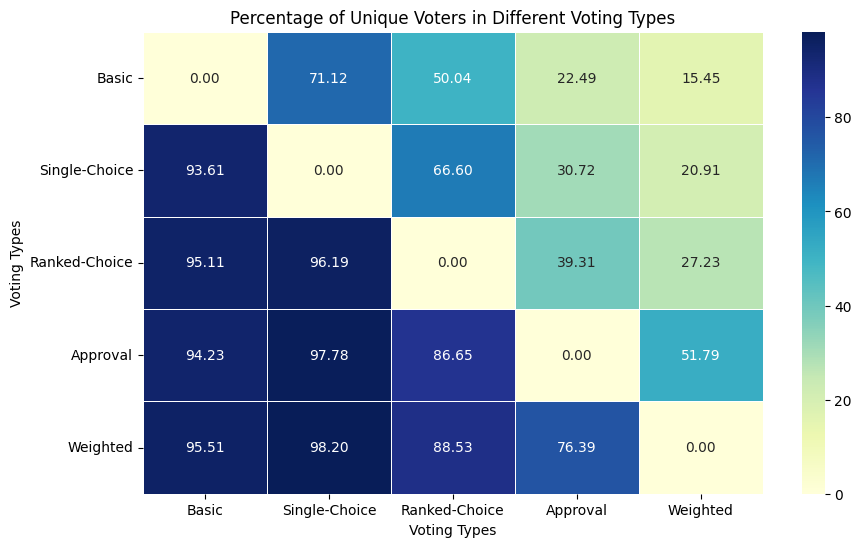

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Percentage of Unique Voters in Different Voting Types')
plt.xlabel('Voting Types')
plt.ylabel('Voting Types')
plt.show()

In [ ]:
fig = px.imshow(df, 
                labels=dict(x="Voting Types", y="Voting Types", color="Percentage"),
                x=df.columns,
                y=df.index,
                color_continuous_scale='YlOrRd',
                title='Percentage of Unique Voters in Different Voting Types')
fig.update_layout(xaxis_title='Voting Types',
                  yaxis_title='Voting Types',
                  width=800,
                  height=600)

# Add annotations for each cell with white font color
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        fig.add_annotation(x=df.columns[j], y=df.index[i], text=f"{df.iloc[i, j]:.2f}%", showarrow=False, font=dict(color="black"))

fig.show()
pie_chart_voters.write_html(r'Graphs\overlapping-voters-heatmap.html')

In [ ]:
# https://black-decisive-cobra-689.mypinata.cloud/ipfs/

## Voting Behavior Analysis:
How does voting behavior vary across different types of proposals? Are there differences in participation rates, voting patterns, or engagement levels?
Do certain types of proposals tend to attract more active or influential voters compared to others?

In [19]:
all_data1.columns

Index(['Vote_ID', 'Voter', 'Voting_Power', 'Vote_Creation_Date',
       'Voting_Reason', 'Vote_Year', 'Vote_Month', 'Vote_Day', 'Vote_Time',
       'Proposal_ID', 'Proposal_Title', 'Proposal_Body', 'Proposal_Type',
       'Proposal_Creation_Date', 'Proposal_Start_Date', 'Proposal_End_Date',
       'Proposal_Year', 'Proposal_Month', 'Proposal_Day', 'Proposal_Time',
       'Proposal_Choices', 'Voting_Choice'],
      dtype='object')

In [21]:
# Step 1: Participation Rates
participation_rates = all_data1.groupby('Proposal_Type')['Voter'].nunique() / all_data1['Voter'].nunique()

# Step 2: Voting Patterns
voting_patterns = all_data1.groupby(['Proposal_Type', 'Voting_Choice']).size().unstack(fill_value=0)

# Step 3: Engagement Levels
engagement_levels = all_data1.groupby('Proposal_Type')['Voter'].nunique()

# Step 4: Influential Voters
influential_voters = all_data1.groupby('Voter')['Voting_Power'].sum().sort_values(ascending=False).head(10)

# Display the results
print("Participation Rates by Proposal Type:")
print(participation_rates)

Participation Rates by Proposal Type:
Proposal_Type
approval         0.225073
basic            0.943057
ranked-choice    0.496107
single-choice    0.716539
weighted         0.152605
Name: Voter, dtype: float64


In [24]:
print("\nEngagement Levels by Proposal Type:")
engagement_levels


Engagement Levels by Proposal Type:


Proposal_Type
approval          34431
basic            144266
ranked-choice     75893
single-choice    109614
weighted          23345
Name: Voter, dtype: int64

In [28]:
# Influential Voters
influential_voters = all_data1.groupby('Voter')['Voting_Power'].sum().sort_values(ascending=False).head(20)

print("\nTop 10 Influential Voters:")
influential_voters


Top 10 Influential Voters:


Voter
0x0eB5B03c0303f2F47cD81d7BE4275AF8Ed347576    3.333747e+09
0x1B686eE8E31c5959D9F5BBd8122a58682788eeaD    2.529468e+09
0xF4B0556B9B6F53E00A1FDD2b0478Ce841991D8fA    2.034149e+09
0x839395e20bbB182fa440d08F850E6c7A8f6F0780    1.561429e+09
0x190473B3071946df65306989972706A4c006A561    1.126848e+09
0xBbE98D590d7eB99F4a236587f2441826396053d3    7.578483e+08
0xF92F185AbD9E00F56cb11B0b709029633d1E37B4    6.913914e+08
0x18BF1a97744539a348304E9d266aAc7d446a1582    5.221569e+08
0x2ef27b114917dD53f8633440A7C0328fef132e2F    5.129338e+08
0xA5dF0cf3F95C6cd97d998b9D990a86864095d9b0    4.473102e+08
0xb5B069370Ef24BC67F114e185D185063CE3479f8    4.321645e+08
0x2e3BEf6830Ae84bb4225D318F9f61B6b88C147bF    4.219545e+08
0xAbAbE91A907fAdff921720C43ABe4098e7245E99    3.756727e+08
0x47E98aA12dB2017295d33e94002521820442F827    3.748894e+08
0x79C4213a328E3B4F1D87b4953C14759399dB25E2    3.341474e+08
0x5aB0Fdc6F0CA9Ea178c95cECCf944A4ce1AedDdD    2.388087e+08
0x9808E45C613eBA00bA18fB3D314dC4d4712c4A85    2.24

In [29]:
# Step 1: Filter the dataset for rows where influential voters have voted
influential_votes = all_data1[all_data1['Voter'].isin(influential_voters.index)]

# Step 2: Group by Proposal_Type and count unique Proposal_IDs
proposal_counts_by_type = influential_votes.groupby('Proposal_Type')['Proposal_ID'].nunique()

# Step 3: Display the counts for each Proposal_Type
print("Number of Proposals Based on Types for Top 10 Influential Voters:")
proposal_counts_by_type

Number of Proposals Based on Types for Top 10 Influential Voters:


Proposal_Type
approval           2
basic            114
ranked-choice      7
single-choice     19
weighted           1
Name: Proposal_ID, dtype: int64